Que1.-
Predict if a person would buy life insurance based on his age using logistic regression.
About Dataset - Age: Age of a person
bought_insurance : whether person buys Insurance or not (0 - No, 1 - Yes)
predict it for Age : 58,30,20,49,53

Dataset : insurance_data.csv

Calculate Accuracy by confusion matrix, Calculate accuracy score, precision score, recall score,f1 score, roc auc score. 
Also Visualize the result. Also select best parameters using gridsearchCV.

### import required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [44]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


### exploratory data analysis

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


In [46]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [47]:
df.isna().sum()

age                 0
bought_insurance    0
dtype: int64

In [7]:
# check if the data is balanced
df['bought_insurance'].value_counts()

bought_insurance
1    14
0    13
Name: count, dtype: int64

In [9]:
x = df.drop('bought_insurance',axis=1)
y = df['bought_insurance']

In [12]:
# split the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
        x, y, train_size=0.7, random_state=123456)

### train the model

In [14]:
from sklearn.linear_model import LogisticRegression

# create the model
model = LogisticRegression(max_iter=1000)

# train the model
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
model.predict([[58],[30],[20],[49],[53]])

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0, 0, 1, 1], dtype=int64)

### model evaulation

In [16]:
y_pred = model.predict(x_test)
y_true = y_test

#### confusion matrix

In [17]:
# create confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm

array([[3, 1],
       [0, 5]], dtype=int64)

#### accuracy

In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
accuracy

0.8888888888888888

#### precision

In [26]:
from sklearn.metrics import precision_score

# calcuate the positive precision
precision = precision_score(y_true, y_pred)
precision

0.8333333333333334

#### recall

In [27]:
from sklearn.metrics import recall_score

recall = recall_score(y_true, y_pred)
recall

1.0

### F1 score

In [28]:
f1_positive = 2 * ((precision * recall) / (precision + recall))
f1_positive

0.9090909090909091

### Auc RoC

In [29]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_true, y_pred)
score

0.875

### result visualization

Text(0, 0.5, 'Insurance bought')

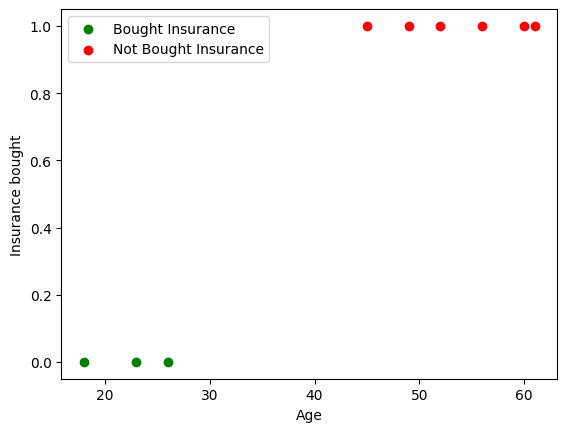

In [32]:
plt.scatter(
    x_test['age'][y_pred == 0], 
    y_pred[y_pred == 0], 
    color="green",
    label="Bought Insurance")

plt.scatter(
    x_test['age'][y_pred == 1], 
    y_pred[y_pred == 1], 
    color="red",
    label="Not Bought Insurance")

plt.legend()
plt.xlabel("Age")
plt.ylabel("Insurance bought")

### model optimization

In [35]:
# this section will try to find the optimal values of hyper parameters of LogisticRegression
from sklearn.model_selection import GridSearchCV

# create a dictionary with all possible hyperparamters along with their possible values
hyper_parameters = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": [10, 5, 1.0, 0.1, 0.01, 0.001],
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

# create a grid search object
grid_search_cv = GridSearchCV(estimator=model, param_grid=hyper_parameters)

In [36]:
grid_search_cv

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [10, 5, 1.0, 0.1, 0.01, 0.001],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [37]:
# do the permutations and combinations of hyper parameters and their values
grid_search_cv.fit(x_train, y_train)

C:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\P

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [10, 5, 1.0, 0.1, 0.01, 0.001],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [38]:
grid_search_cv.best_score_

0.9

In [39]:
grid_search_cv.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}